In [1]:
import pandas as pd
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from dragsUtility import * 
import spacy
import statistics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
all_tweets = []

with open('Data/SingleEpisodes/rutweetE09.json') as json_file:
    all_tweets = json.load(json_file)

with open('Data/SingleEpisodes/rutweetE10.json') as json_file:
    all_tweets += json.load(json_file)

with open('Data/SingleEpisodes/rutweetE11.json') as json_file:
    all_tweets += json.load(json_file)

with open('Data/SingleEpisodes/rutweetE12.json') as json_file:
    all_tweets += json.load(json_file)

with open('Data/SingleEpisodes/rutweetE13.json') as json_file:
    all_tweets += json.load(json_file)
with open('Data/SingleEpisodes/rutweetE16.json') as json_file:
    all_tweets += json.load(json_file)
len(all_tweets)

118234

In [3]:
def isMentionedThatDrag(matching_rules, drag):
    for rule in matching_rules:
        if rule["tag"] == drag:
            return True
    return False

In [4]:
dUtility = DragsUtility()

In [5]:
with open('Data/addToLexiton.json') as json_file:
    addToLexiton = json.load(json_file)
addToLexiton = {key:  (((value - (-1))/ (1 - (-1))) * (5 - (-5))) + -5 for (key,value) in addToLexiton.items()}

analyzer = SentimentIntensityAnalyzer()
analyzer.lexicon.update(addToLexiton)

In [6]:
drags = [ "@" + dUtility.getInfoAboutQueenByName(dragName)["Twitter_handler"] for dragName in dUtility.getRealRanking()]
drags

['@the_symonee',
 '@TheKandyMuse',
 '@gottmik',
 '@omgheyrose',
 '@TheOliviaLux',
 '@QueenUtica',
 '@TheTinaBurner',
 '@denalifox',
 '@theelliottqueen',
 '@MissLaLaRi',
 '@TamishaIman1',
 '@joeyjayisgay',
 '@KahmoraHall']

In [7]:
tweets = {}
for drag in drags:
    tweets[drag] = list(filter(lambda x: \
        isMentionedThatDrag(x["matching_rules"], drag) , all_tweets)) 
print(len(tweets["@TheOliviaLux"]))
[(drag_tweet, len(tweets[drag_tweet])) for drag_tweet in tweets.keys()]


1441


[('@the_symonee', 15545),
 ('@TheKandyMuse', 9155),
 ('@gottmik', 10046),
 ('@omgheyrose', 5188),
 ('@TheOliviaLux', 1441),
 ('@QueenUtica', 2652),
 ('@TheTinaBurner', 717),
 ('@denalifox', 7600),
 ('@theelliottqueen', 57),
 ('@MissLaLaRi', 3295),
 ('@TamishaIman1', 112),
 ('@joeyjayisgay', 160),
 ('@KahmoraHall', 277)]

In [8]:
analyzer = SentimentIntensityAnalyzer()
compound_scores=[]
drags_compound_scores = []
for drag in drags:
    for tweet in tweets[drag]:
        vs = analyzer.polarity_scores(tweet["data"]["text"])
        #print("{:-<65} {}".format(tweet["data"]["text"], str(vs)))
        compound_scores.append(vs['compound'])
    print(f"{drag}: Score: {np.percentile(compound_scores, 75)}")
    drags_compound_scores.append({"drag": drag, 'likeability': np.percentile(compound_scores, 75)})
    compound_scores=[]

@the_symonee: Score: 0.6289
@TheKandyMuse: Score: 0.5859
@gottmik: Score: 0.5871
@omgheyrose: Score: 0.792975
@TheOliviaLux: Score: 0.7125
@QueenUtica: Score: 0.524
@TheTinaBurner: Score: 0.2023
@denalifox: Score: 0.6705
@theelliottqueen: Score: 0.4588
@MissLaLaRi: Score: 0.71885
@TamishaIman1: Score: 0.264
@joeyjayisgay: Score: 0.4019
@KahmoraHall: Score: 0.7249


In [9]:
rank_by_likeability = sorted(drags_compound_scores, key=lambda k: k['likeability'], reverse = True) 
rank_by_likeability

[{'drag': '@omgheyrose', 'likeability': 0.792975},
 {'drag': '@KahmoraHall', 'likeability': 0.7249},
 {'drag': '@MissLaLaRi', 'likeability': 0.71885},
 {'drag': '@TheOliviaLux', 'likeability': 0.7125},
 {'drag': '@denalifox', 'likeability': 0.6705},
 {'drag': '@the_symonee', 'likeability': 0.6289},
 {'drag': '@gottmik', 'likeability': 0.5871},
 {'drag': '@TheKandyMuse', 'likeability': 0.5859},
 {'drag': '@QueenUtica', 'likeability': 0.524},
 {'drag': '@theelliottqueen', 'likeability': 0.4588},
 {'drag': '@joeyjayisgay', 'likeability': 0.4019},
 {'drag': '@TamishaIman1', 'likeability': 0.264},
 {'drag': '@TheTinaBurner', 'likeability': 0.2023}]

In [10]:
df = pd.DataFrame(rank_by_likeability)
df

,drag,likeability
0,@omgheyrose,0.792975
1,@KahmoraHall,0.724900
2,@MissLaLaRi,0.718850
3,@TheOliviaLux,0.712500
4,@denalifox,0.670500
5,@the_symonee,0.628900
6,@gottmik,0.587100
7,@TheKandyMuse,0.585900
8,@QueenUtica,0.524000
9,@theelliottqueen,0.458800


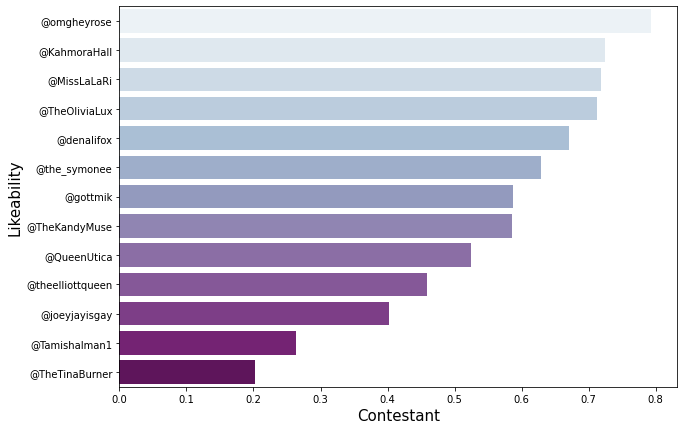

In [11]:
f, ax = plt.subplots(figsize=(10, 7))

sns.barplot(x="likeability", y="drag", data=df, palette = "BuPu")
plt.xlabel("Contestant", fontsize= 15)
plt.ylabel("Likeability", fontsize= 15)
plt.savefig("Images/Likeability.png", dpi=1200, bbox_inches='tight')
plt.show()